In [1]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [6]:
image = cv2.imread('/Users/macbookvera/Downloads/Данные/Положение 0/1.bmp')

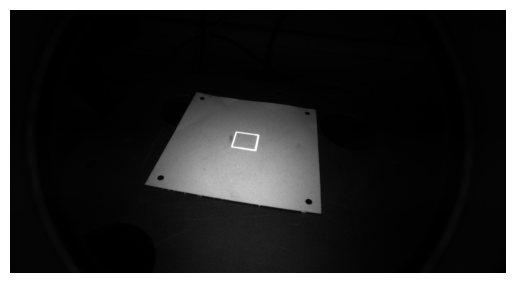

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.axis('off')

plt.show()


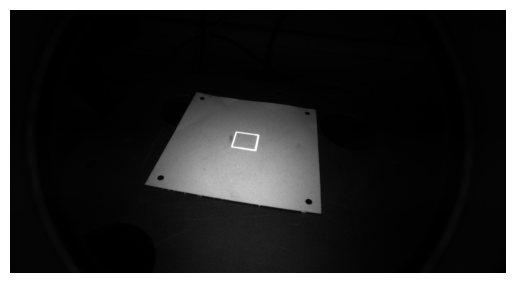

[]


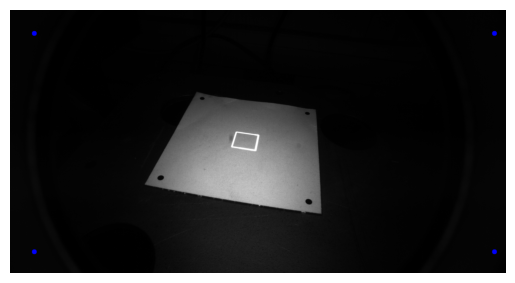

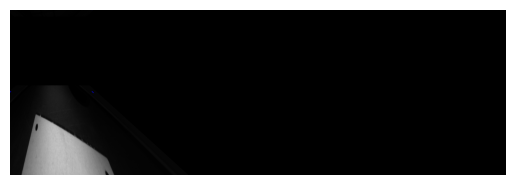

In [ ]:
import numpy as np
image = cv2.imread('/Users/macbookvera/Downloads/Данные/Положение 1')

tl = (100, 100)
tr = (2000, 100)
bl = (100, 1000)
br = (2000, 1000)

cv2.circle(image, tl, 10, (0, 0, 255), -1)
cv2.circle(image, tr, 10, (0, 0, 255), -1)
cv2.circle(image, bl, 10, (0, 0, 255), -1)
cv2.circle(image, br, 10, (0, 0, 255), -1)


plt.imshow(image)
plt.axis('off')
plt.show()



pts1 = np.float32([tl, tr, bl, br])
pts2 = np.float32([[0, 0], [500, 0], [500, 500], [0, 500]])

matrix = cv2.getPerspectiveTransform(pts1, pts2)

warped = cv2.warpPerspective(image, matrix, (3000, 1000))

plt.imshow(warped)
plt.axis('off')
plt.show()


In [ ]:
import torch


# Now you can import CircleNet
from network import Net
# Загружаем модель
model = Net()
checkpoint = torch.load('./model.pth.tar', map_location="cpu")
model.load_state_dict(checkpoint['state_dict'])
model.eval()

# Загружаем и подготавливаем изображение
checkpoint = torch.load('./model.pth.tar', map_location="cpu")

if isinstance(checkpoint, dict) and 'state_dict' in checkpoint:
    model.load_state_dict(checkpoint['state_dict'])
else:
    model.load_state_dict(checkpoint)



# img = cv2.imread("/Users/macbookvera/Downloads/Данные/Положение 1/Image__2025-07-15__15-22-22.bmp", cv2.IMREAD_GRAYSCALE)
# img_resized = cv2.resize(img, (320, 320))
# input_tensor = torch.from_numpy(img_resized.astype(np.float32) / 255.0).unsqueeze(0).unsqueeze(0)

# # Предсказание
# with torch.no_grad():
#     output = model(input_tensor)
#     x_norm, y_norm, r_norm = output[0].numpy()

# # Переводим координаты в оригинальные пиксели
# h, w = img.shape
# x_px = int(x_norm * w / 320)
# y_px = int(y_norm * h / 320)
# r_px = int(r_norm * max(w, h) / 320)

# # Показываем результат
# img_vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
# cv2.circle(img_vis, (x_px, y_px), r_px, (0, 255, 0), 2)
# cv2.imshow("Circle Detected", img_vis)
# cv2.waitKey(0)


KeyError: 'state_dict'

In [8]:
import torch
import cv2
import numpy as np
from network import Net  # твоя модель

# Путь к модели и изображению (укажи свои пути)
model_path = './model.pth.tar'
image_path = '/Users/macbookvera/Downloads/Данные/Положение 1/Image__2025-07-15__15-22-22.bmp'

# Загружаем модель
model = Net()
checkpoint = torch.load(model_path, map_location='cpu')

# Если checkpoint - это просто state_dict, загружаем напрямую
if isinstance(checkpoint, dict) and 'state_dict' in checkpoint:
    model.load_state_dict(checkpoint['state_dict'])
else:
    model.load_state_dict(checkpoint)

model.eval()

# Загружаем и подготавливаем изображение
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError(f"Не удалось загрузить изображение по пути: {image_path}")

img_resized = cv2.resize(img, (320, 320))
input_tensor = torch.from_numpy(img_resized.astype(np.float32) / 255.0).unsqueeze(0).unsqueeze(0)

# Предсказание
with torch.no_grad():
    output = model(input_tensor)
    x_norm, y_norm, r_norm = output[0].numpy()

# Переводим координаты из нормализованных обратно в пиксели исходного изображения
h, w = img.shape
x_px = int(x_norm * 320 * (w / 320))
y_px = int(y_norm * 320 * (h / 320))
r_px = int(r_norm * 320 * (max(w, h) / 320))

# Визуализация
img_vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.circle(img_vis, (x_px, y_px), r_px, (0, 255, 0), 2)

cv2.imshow("Circle Detected", img_vis)
cv2.waitKey(0)
cv2.destroyAllWindows()


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x5184 and 1764x256)

In [ ]:
import torch
import torch.nn as nn
import cv2
import numpy as np

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Простая свёрточная часть
        self.conv = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=3, stride=2, padding=1),  # 320 -> 160
            nn.ReLU(),
            nn.Conv2d(8, 16, kernel_size=3, stride=2, padding=1), # 160 -> 80
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),# 80 -> 40
            nn.ReLU(),
        )
        # Полносвязные слои
        # Вход: 32 каналов * 40 * 40 = 51200
        self.fc = nn.Sequential(
            nn.Linear(32*40*40, 128),
            nn.ReLU(),
            nn.Linear(128, 3),  # выход x, y, r (в нормализованном виде)
            nn.Sigmoid()        # чтобы значения были от 0 до 1
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Загружаем модель (если есть веса)
model = Net()
try:
    checkpoint = torch.load('./model.pth.tar', map_location='cpu')
    if isinstance(checkpoint, dict) and 'state_dict' in checkpoint:
        model.load_state_dict(checkpoint['state_dict'])
    else:
        model.load_state_dict(checkpoint)
    print("Модель загружена")
except Exception as e:
    print(f"Не удалось загрузить модель, будет использоваться случайная инициализация: {e}")

model.eval()

# Путь к изображению
image_path = "/Users/macbookvera/Downloads/Данные/Положение 1/Image__2025-07-15__15-22-22.bmp"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError(f"Не удалось загрузить изображение по пути: {image_path}")

# Подготовка изображения
img_resized = cv2.resize(img, (320, 320))
input_tensor = torch.from_numpy(img_resized.astype(np.float32) / 255.0).unsqueeze(0).unsqueeze(0)

# Предсказание
with torch.no_grad():
    output = model(input_tensor)
    x_norm, y_norm, r_norm = output[0].numpy()

# Переводим нормализованные координаты в исходное изображение
h, w = img.shape
x_px = int(x_norm * w)
y_px = int(y_norm * h)
r_px = int(r_norm * max(w, h))

# Визуализация
img_vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.circle(img_vis, (x_px, y_px), r_px, (0, 255, 0), 2)

cv2.imshow("Circle Detected", img_vis)
cv2.waitKey(0)
cv2.destroyAllWindows()


Не удалось загрузить модель, будет использоваться случайная инициализация: Error(s) in loading state_dict for Net:
	Missing key(s) in state_dict: "conv.0.weight", "conv.0.bias", "conv.2.weight", "conv.2.bias", "conv.4.weight", "conv.4.bias", "fc.0.weight", "fc.0.bias", "fc.2.weight", "fc.2.bias". 
	Unexpected key(s) in state_dict: "L1.0.weight", "L1.0.bias", "L1.1.weight", "L1.1.bias", "L1.1.running_mean", "L1.1.running_var", "L1.1.num_batches_tracked", "L2.0.weight", "L2.0.bias", "L2.1.weight", "L2.1.bias", "L2.1.running_mean", "L2.1.running_var", "L2.1.num_batches_tracked", "L3.0.weight", "L3.0.bias", "L3.1.weight", "L3.1.bias", "L3.1.running_mean", "L3.1.running_var", "L3.1.num_batches_tracked", "L4.0.weight", "L4.0.bias", "L4.1.weight", "L4.1.bias", "L4.1.running_mean", "L4.1.running_var", "L4.1.num_batches_tracked", "L5.0.weight", "L5.0.bias", "L5.1.weight", "L5.1.bias", "L5.1.running_mean", "L5.1.running_var", "L5.1.num_batches_tracked", "FC.0.weight", "FC.0.bias", "FC.2.weight",

2025-07-18 22:49:07.301 Python[5881:2523616] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


In [ ]:
import cv2
import numpy as np

# Загружаем изображение в градациях серого
img = cv2.imread("/Users/macbookvera/Downloads/Данные/Положение 1/Image__2025-07-15__15-22-22.bmp", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Не удалось загрузить изображение")

# Немного размываем, чтобы убрать шум
img_blur = cv2.medianBlur(img, 5)

# Параметры для обнаружения кругов
circles = cv2.HoughCircles(
    img_blur,
    cv2.HOUGH_GRADIENT,
    dp=1.2,          # разрешение аккумулятора (чем больше — тем точнее, но медленнее)
    minDist=10,      # минимальное расстояние между центрами найденных кругов
    param1=50,       # порог для Canny edge detector (внутри метода)
    param2=30,       # порог для центра круга (чем ниже — тем больше ложных срабатываний)
    minRadius=5,     # минимальный радиус круга
    maxRadius=50     # максимальный радиус круга
)

# Конвертируем в цвет для рисования цветных кругов
img_vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for (x, y, r) in circles[0, :]:
        cv2.circle(img_vis, (x, y), r, (0, 255, 0), 2)
        cv2.circle(img_vis, (x, y), 2, (0, 0, 255), 3)  # маленькая точка в центре круга

cv2.imshow("Detected Circles", img_vis)
cv2.waitKey(0)
cv2.destroyAllWindows()


2025-07-18 22:52:53.111 Python[6074:2527603] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


In [2]:
import cv2
import numpy as np

# Загрузка изображения (серое)
img = cv2.imread("/Users/macbookvera/Downloads/Данные/Положение 1/Image__2025-07-15__15-22-22.bmp", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Не удалось загрузить изображение")

# Немного размываем для снижения шума
img_blur = cv2.GaussianBlur(img, (9, 9), 2)

# Параметры для HoughCircles - подбери под свои данные
circles = cv2.HoughCircles(
    img_blur,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=15,
    param1=50,
    param2=15,   # снизил порог для большей чувствительности
    minRadius=5,
    maxRadius=30
)

img_vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Списки для координат центров кругов
centers_x = []
centers_y = []

if circles is not None:
    circles = np.uint16(np.around(circles))
    for (x, y, r) in circles[0, :]:
        centers_x.append(x)
        centers_y.append(y)
        cv2.circle(img_vis, (x, y), r, (0, 255, 0), 2)
        cv2.circle(img_vis, (x, y), 2, (0, 0, 255), 3)

print("Координаты центров кругов (x):", centers_x)
print("Координаты центров кругов (y):", centers_y)

cv2.imshow("Detected Circles", img_vis)
cv2.waitKey(1)
cv2.destroyAllWindows()


Координаты центров кругов (x): [np.uint16(1240), np.uint16(629), np.uint16(1233), np.uint16(797)]
Координаты центров кругов (y): [np.uint16(796), np.uint16(711), np.uint16(428), np.uint16(381)]
